**Data Collect**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config IPCompleter.greedy=True
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# 1. Carga del dataset
# Montar Google Drive (esto solo es necesario una vez por sesión)
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/OLIVA_PARCIAL/Laptops_TecnoMarket.csv", sep=';')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Fabricante,Modelo,Precio_Promedio,RAM_GB,Almacenamiento_GB,Tipo_Almacenamiento,Nucleos_CPU,Frecuencia_GHz,Tamanio_Pantalla_Pulg,Peso (kg),ID_Interno,COD_Modelo,Constante
0,Huawei,M0894,1.470,32.000,1024.000,SSD,4.000,2.720,16.000,1.890,ID20000,CM45000,X
1,Dell,M0537,0.720,16.000,512.000,SSD,2.000,2.590,15.600,2.170,ID20001,CM45001,X
2,Apple,M1791,1.420,8.000,512.000,SSD,6.000,2.690,14.000,1.320,ID20002,CM45002,X
3,Apple,M1675,1.710,8.000,512.000,SSD,6.000,2.460,14.000,1.320,ID20003,CM45003,X
4,Huawei,M0842,0.690,24.000,1024.000,SSD,2.000,2.580,16.000,1.700,ID20004,CM45004,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,Dell,M1383,1.040,16.000,512.000,SSD,4.000,2.310,16.000,1.660,ID20439,CM45439,X
608,HP,M0598,0.770,16.000,256.000,HDD,8.000,NaN,14.000,1.720,ID20053,CM45053,X
609,Lenovo,M1111,1.770,16.000,256.000,HDD,4.000,3.260,14.000,1.220,ID20397,CM45397,X
610,Dell,M1967,1.310,12.000,512.000,HDD,4.000,2.920,13.300,1.890,ID20060,CM45060,X


Data Quality & Cleaning

In [ ]:
# Cambiar nombres de columnas a MAYÚSCULAS
df.columns = df.columns.str.upper()

# Eliminar duplicados de filas completas
df.drop_duplicates(inplace=True)

# Eliminar columnas constantes y columnas código
# Identificar columnas constantes
constant_columns = df.columns[df.nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

# Eliminar columnas código que no aporten
code_columns = ['ID_INTERNO', 'COD_MODELO']
df.drop(columns=[col for col in code_columns if col in df.columns], inplace=True)


# Eliminar filas con > 40% de columnas nulas
threshold = len(df.columns) * 0.6 # Keep rows with at least 60% non-null values
df.dropna(thresh=threshold, inplace=True)

# Mostrar información del DataFrame después de la limpieza
print("DataFrame después de la limpieza:")
df.info()
display(df.head())

DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FABRICANTE             591 non-null    object 
 1   MODELO                 590 non-null    object 
 2   PRECIO_PROMEDIO        590 non-null    float64
 3   RAM_GB                 591 non-null    float64
 4   ALMACENAMIENTO_GB      591 non-null    float64
 5   TIPO_ALMACENAMIENTO    528 non-null    object 
 6   NUCLEOS_CPU            590 non-null    float64
 7   FRECUENCIA_GHZ         530 non-null    float64
 8   TAMANIO_PANTALLA_PULG  590 non-null    float64
 9   PESO (KG)              591 non-null    float64
dtypes: float64(7), object(3)
memory usage: 50.8+ KB


,FABRICANTE,MODELO,PRECIO_PROMEDIO,RAM_GB,ALMACENAMIENTO_GB,TIPO_ALMACENAMIENTO,NUCLEOS_CPU,FRECUENCIA_GHZ,TAMANIO_PANTALLA_PULG,PESO (KG)
0,Huawei,M0894,1.470,32.000,1024.000,SSD,4.000,2.720,16.000,1.890
1,Dell,M0537,0.720,16.000,512.000,SSD,2.000,2.590,15.600,2.170
2,Apple,M1791,1.420,8.000,512.000,SSD,6.000,2.690,14.000,1.320
3,Apple,M1675,1.710,8.000,512.000,SSD,6.000,2.460,14.000,1.320
4,Huawei,M0842,0.690,24.000,1024.000,SSD,2.000,2.580,16.000,1.700


In [ ]:
# Gestión de Nulos
print("\nColumnas con valores nulos y sus conteos:")
print(df.isnull().sum())

# Imputar TIPO_ALMACENAMIENTO basado en RAM_GB
# Documentación: Si RAM_GB es nulo, esta regla de imputación no se aplicará a esa fila
# y el valor nulo en TIPO_ALMACENAMIENTO permanecerá nulo a menos que se aplique otra regla.
df['TIPO_ALMACENAMIENTO'] = np.where(
    (df['TIPO_ALMACENAMIENTO'].isnull()) & (df['RAM_GB'] >= 16),
    'SSD',
    np.where(
        (df['TIPO_ALMACENAMIENTO'].isnull()) & (df['RAM_GB'] < 16),
        'HDD',
        df['TIPO_ALMACENAMIENTO'] # Keep existing value if not null
    )
)

# Imputar FRECUENCIA_GHZ con el promedio por FABRICANTE
df['FRECUENCIA_GHZ'] = df.groupby('FABRICANTE')['FRECUENCIA_GHZ'].transform(lambda x: x.fillna(x.mean()))

print("\nColumnas con valores nulos después de la imputación de nulos:")
print(df.isnull().sum())


# Gestión de Atípicos
print("\nGestión de Atípicos en PESO (KG):")
Q1 = df['PESO (KG)'].quantile(0.25)
Q3 = df['PESO (KG)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['PESO (KG)'] < lower_bound) | (df['PESO (KG)'] > upper_bound)]

if not outliers.empty:
    print(f"\nSe detectaron {len(outliers)} atípicos en PESO (KG).")
    print("Atípicos encontrados:")
    display(outliers)

    # Imputar atípicos con la mediana
    median_peso_kg = df['PESO (KG)'].median()
    df['PESO (KG)'] = np.where(
        (df['PESO (KG)'] < lower_bound) | (df['PESO (KG)'] > upper_bound),
        median_peso_kg,
        df['PESO (KG)']
    )
    print(f"\nLos atípicos en PESO (KG) han sido imputados con la mediana ({median_peso_kg:.3f}).")
else:
    print("\nNo se detectaron atípicos en PESO (KG).")

print("\nInformación del DataFrame después de la gestión de nulos y atípicos:")
df.info()
display(df.head())


Columnas con valores nulos y sus conteos:
FABRICANTE                0
MODELO                    1
PRECIO_PROMEDIO           1
RAM_GB                    0
ALMACENAMIENTO_GB         0
TIPO_ALMACENAMIENTO      63
NUCLEOS_CPU               1
FRECUENCIA_GHZ           61
TAMANIO_PANTALLA_PULG     1
PESO (KG)                 0
dtype: int64

Columnas con valores nulos después de la imputación de nulos:
FABRICANTE               0
MODELO                   1
PRECIO_PROMEDIO          1
RAM_GB                   0
ALMACENAMIENTO_GB        0
TIPO_ALMACENAMIENTO      0
NUCLEOS_CPU              1
FRECUENCIA_GHZ           0
TAMANIO_PANTALLA_PULG    1
PESO (KG)                0
dtype: int64

Gestión de Atípicos en PESO (KG):

Se detectaron 7 atípicos en PESO (KG).
Atípicos encontrados:


,FABRICANTE,MODELO,PRECIO_PROMEDIO,RAM_GB,ALMACENAMIENTO_GB,TIPO_ALMACENAMIENTO,NUCLEOS_CPU,FRECUENCIA_GHZ,TAMANIO_PANTALLA_PULG,PESO (KG)
141,Lenovo,M1753,0.870,8.000,512.000,SSD,8.000,2.950,15.600,2.770
143,Dell,M0264,0.930,32.000,512.000,SSD,4.000,2.810,16.000,3.750
236,Asus,M0096,0.600,16.000,256.000,HDD,6.000,2.940,15.600,2.740
437,Dell,M1460,0.400,12.000,256.000,SSD,4.000,2.695,13.300,4.200
438,MSI,M1962,1.470,8.000,512.000,HDD,6.000,2.737,16.000,4.100
480,MSI,M0933,0.800,8.000,512.000,HDD,8.000,2.310,17.000,3.800
502,Huawei,M1586,0.540,16.000,256.000,SSD,4.000,3.420,15.600,3.900



Los atípicos en PESO (KG) han sido imputados con la mediana (1.720).

Información del DataFrame después de la gestión de nulos y atípicos:
<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FABRICANTE             591 non-null    object 
 1   MODELO                 590 non-null    object 
 2   PRECIO_PROMEDIO        590 non-null    float64
 3   RAM_GB                 591 non-null    float64
 4   ALMACENAMIENTO_GB      591 non-null    float64
 5   TIPO_ALMACENAMIENTO    591 non-null    object 
 6   NUCLEOS_CPU            590 non-null    float64
 7   FRECUENCIA_GHZ         591 non-null    float64
 8   TAMANIO_PANTALLA_PULG  590 non-null    float64
 9   PESO (KG)              591 non-null    float64
dtypes: float64(7), object(3)
memory usage: 50.8+ KB


,FABRICANTE,MODELO,PRECIO_PROMEDIO,RAM_GB,ALMACENAMIENTO_GB,TIPO_ALMACENAMIENTO,NUCLEOS_CPU,FRECUENCIA_GHZ,TAMANIO_PANTALLA_PULG,PESO (KG)
0,Huawei,M0894,1.470,32.000,1024.000,SSD,4.000,2.720,16.000,1.890
1,Dell,M0537,0.720,16.000,512.000,SSD,2.000,2.590,15.600,2.170
2,Apple,M1791,1.420,8.000,512.000,SSD,6.000,2.690,14.000,1.320
3,Apple,M1675,1.710,8.000,512.000,SSD,6.000,2.460,14.000,1.320
4,Huawei,M0842,0.690,24.000,1024.000,SSD,2.000,2.580,16.000,1.700


**EDA**

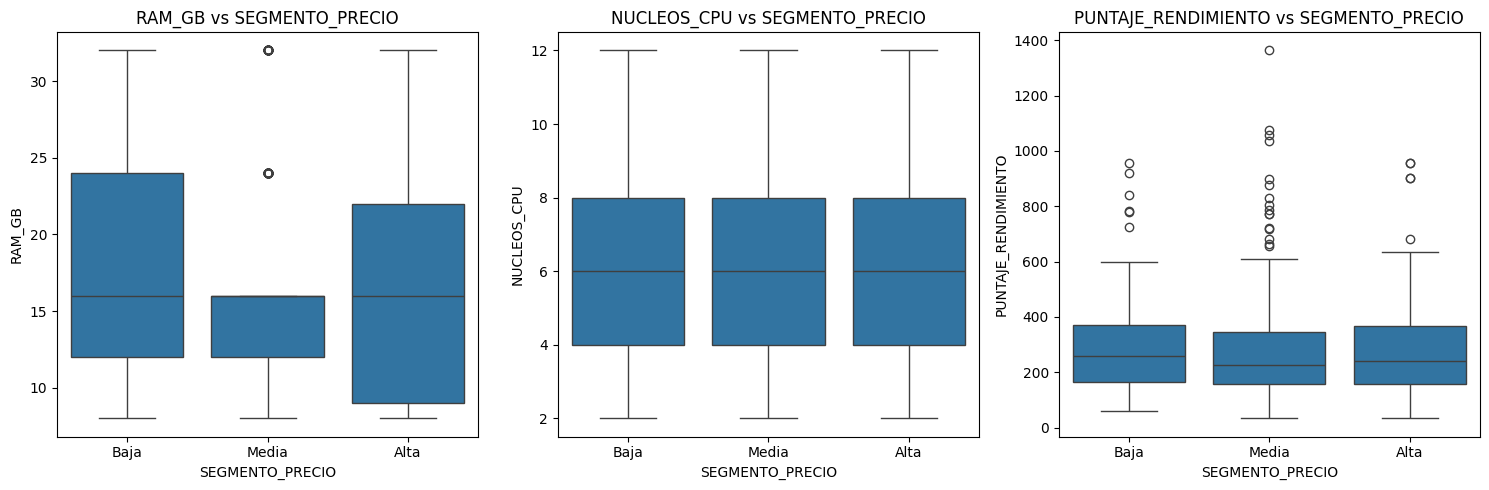


Valores medios por segmento de precio:


,RAM_GB,NUCLEOS_CPU,PUNTAJE_RENDIMIENTO
SEGMENTO_PRECIO,,,
Alta,16.232,6.161,286.299
Baja,16.807,6.294,294.834
Media,16.349,6.116,276.730


In [ ]:
# Crea PUNTAJE_RENDIMIENTO como combinación simple:
df['PUNTAJE_RENDIMIENTO'] = df['RAM_GB'] * df['FRECUENCIA_GHZ'] * df['NUCLEOS_CPU']

# Crea SEGMENTO_PRECIO:
def categorize_price(precio):
    if precio <= 0.60:
        return 'Baja'
    elif 0.60 < precio <= 1.20:
        return 'Media'
    else:
        return 'Alta'

df['SEGMENTO_PRECIO'] = df['PRECIO_PROMEDIO'].apply(categorize_price)

# Sustenta (con gráfico o tabla) cuál de estas columnas parece impactar más a SEGMENTO_PRECIO: RAM_GB, NUCLEOS_CPU o PUNTAJE_RENDIMIENTO.

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='SEGMENTO_PRECIO', y='RAM_GB', data=df, order=['Baja', 'Media', 'Alta'])
plt.title('RAM_GB vs SEGMENTO_PRECIO')

plt.subplot(1, 3, 2)
sns.boxplot(x='SEGMENTO_PRECIO', y='NUCLEOS_CPU', data=df, order=['Baja', 'Media', 'Alta'])
plt.title('NUCLEOS_CPU vs SEGMENTO_PRECIO')

plt.subplot(1, 3, 3)
sns.boxplot(x='SEGMENTO_PRECIO', y='PUNTAJE_RENDIMIENTO', data=df, order=['Baja', 'Media', 'Alta'])
plt.title('PUNTAJE_RENDIMIENTO vs SEGMENTO_PRECIO')

plt.tight_layout()
plt.show()

# Además, veamos los valores medios de estas métricas dentro de cada segmento de precio.
print("\nValores medios por segmento de precio:")
display(df.groupby('SEGMENTO_PRECIO')[['RAM_GB', 'NUCLEOS_CPU', 'PUNTAJE_RENDIMIENTO']].mean())

Data **Transformation**

In [ ]:
# --- 4. Data Transformation (One Hot Encoding) ---

# a) Selección de columnas
# Se eligen 'FABRICANTE' y 'TIPO_ALMACENAMIENTO' porque son variables categóricas nominales,
# es decir, no tienen un orden o jerarquía entre sus valores.
columnas_a_transformar = ['FABRICANTE', 'TIPO_ALMACENAMIENTO']
print(f"Columnas seleccionadas para transformar: {columnas_a_transformar}")

# b) Aplicación de One Hot Encoding
# La función pd.get_dummies() crea nuevas columnas binarias (0 o 1) para cada categoría.
# El prefijo (prefix) ayuda a identificar el origen de las nuevas columnas.
df_codificado = pd.get_dummies(df, columns=columnas_a_transformar, prefix=['Fabricante', 'Tipo_Almacenamiento'])

# c) Muestra del resultado
print("\n--- Vista previa del DataFrame con las nuevas columnas codificadas ---")

# Mostramos solo algunas de las nuevas columnas para verificar la transformación
columnas_nuevas_a_mostrar = [col for col in df_codificado.columns if col.startswith('Fabricante_') or col.startswith('Tipo_Almacenamiento_')]
print(df_codificado[columnas_nuevas_a_mostrar].head())

# Para ver todas las columnas del nuevo DataFrame
print("\nDimensiones del nuevo DataFrame (filas, columnas):", df_codificado.shape)

Columnas seleccionadas para transformar: ['FABRICANTE', 'TIPO_ALMACENAMIENTO']

--- Vista previa del DataFrame con las nuevas columnas codificadas ---
   Fabricante_Acer  Fabricante_Apple  Fabricante_Asus  Fabricante_Dell  \
0            False             False            False            False   
1            False             False            False             True   
2            False              True            False            False   
3            False              True            False            False   
4            False             False            False            False   

   Fabricante_HP  Fabricante_Huawei  Fabricante_Lenovo  Fabricante_MSI  \
0          False               True              False           False   
1          False              False              False           False   
2          False              False              False           False   
3          False              False              False           False   
4          False               Tru